# PyMarek Day 3 - Pandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Pandas comes with 3 main classes:

* `Series` - wrapper around a numpy vector, represents columns(variables) in a DataFrame
* `Index` - similar to Series, used to store row/column labels
* `DataFrame` - sequence or dictionary of Series objects of identical lenghts (but different datatypes)

In [3]:
np.random.seed(123)
x = pd.DataFrame({
    'A': np.random.rand(5),
    'B': [True, False, True, None, True],
    'C': ['f', None, 'm', 'f', 'f']
})

In [4]:
x

,A,B,C
0,0.696469,True,f
1,0.286139,False,None
2,0.226851,True,m
3,0.551315,None,f
4,0.719469,True,f


In [5]:
type(x)

pandas.core.frame.DataFrame

In [6]:
p = [
    ('A', np.random.rand(5)),
    ('B', [True, False, True, None, True]),
    ('C', ['f', None, 'm', 'f', 'f'])
]
pd.DataFrame(p)

,0,1
0,A,"[0.42310646012446096, 0.9807641983846155, 0.68..."
1,B,"[True, False, True, None, True]"
2,C,"[f, None, m, f, f]"


In [8]:
pd.DataFrame.from_dict(dict(p)) # pd.DataFrame.from_items(p)

,A,B,C
0,0.423106,True,f
1,0.980764,False,None
2,0.684830,True,m
3,0.480932,None,f
4,0.392118,True,f


In [11]:
birth_dates = pd.read_csv('http://www.gagolewski.com/resources/data/birth_dates.csv', comment='#')
iris = pd.read_csv('http://www.gagolewski.com/resources/data/iris.csv', comment='#')
tips = pd.read_csv('http://www.gagolewski.com/resources/data/tips.csv', comment='#')
flights = pd.read_csv('http://www.gagolewski.com/resources/data/flights.csv', comment='#')

In [12]:
birth_dates.head()

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


In [13]:
birth_dates.head(3)

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958


In [14]:
birth_dates.tail()

,Name,BirthDate
127,Theodor Waxman,15.05.1931
128,Romualdo Marin,04.09.1982
129,Felicita Wilbur,07.06.1982
130,Kaminaga Ichibei,28.03.1996
131,Vania Toler,28.02.2000


In [15]:
birth_dates.shape

(132, 2)

In [16]:
birth_dates.dtypes

Name         object
BirthDate    object
dtype: object

In [18]:
birth_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
Name         132 non-null object
BirthDate    132 non-null object
dtypes: object(2)
memory usage: 2.1+ KB


# Series

In [19]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [20]:
x

,A,B,C
0,0.696469,True,f
1,0.286139,False,None
2,0.226851,True,m
3,0.551315,None,f
4,0.719469,True,f


In [22]:
x.loc[:,'A']

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [23]:
x['A']

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [24]:
x.get('A')

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [25]:
x.A

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [26]:
type(x.A)

pandas.core.series.Series

In [27]:
y = x.A

In [28]:
y.name

'A'

In [30]:
y.name = 'AAARGH'
y

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: AAARGH, dtype: float64

In [31]:
pd.DataFrame(y)

,AAARGH
0,0.696469
1,0.286139
2,0.226851
3,0.551315
4,0.719469


In [32]:
pd.DataFrame(y.rename('Ni!'))

,Ni!
0,0.696469
1,0.286139
2,0.226851
3,0.551315
4,0.719469


In [33]:
y.dtype

dtype('float64')

In [34]:
y.values # returns a numpy vector

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

In [35]:
np.sum(y.values)

2.4802437129808985

In [36]:
np.sum(y)

2.4802437129808985

In [38]:
# date-time data:
pd.Series(pd.date_range('2019-01-31', periods=3, freq='D'))

0   2019-01-31
1   2019-02-01
2   2019-02-02
dtype: datetime64[ns]

In [39]:
pd.Series(pd.date_range('2019-01-31', periods=3, freq='3M'))

0   2019-01-31
1   2019-04-30
2   2019-07-31
dtype: datetime64[ns]

In [ ]:
# number of ns since the UNIX epoch (January 1, 1970 0:00 GMT)

In [40]:
birth_dates.head()

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


In [42]:
birth_dates['BirthDate2'] = pd.to_datetime(birth_dates.loc[:,'BirthDate'], format='%d.%m.%Y')
birth_dates.head()

,Name,BirthDate,BirthDate2
0,Hung Hyun-Seok,12.06.2000,2000-06-12
1,Benno Blumenthal,31.12.1918,1918-12-31
2,Paitoon Ornwimol,26.06.1958,1958-06-26
3,P'yon Yong-Sun,10.07.1947,1947-07-10
4,Étienne Chaney,04.09.1983,1983-09-04


In [45]:
# alternative
birth_dates['BirthDate2'] = pd.to_datetime(birth_dates.loc[:,'BirthDate'], dayfirst=True)
birth_dates.head()

,Name,BirthDate,BirthDate2
0,Hung Hyun-Seok,12.06.2000,2000-06-12
1,Benno Blumenthal,31.12.1918,1918-12-31
2,Paitoon Ornwimol,26.06.1958,1958-06-26
3,P'yon Yong-Sun,10.07.1947,1947-07-10
4,Étienne Chaney,04.09.1983,1983-09-04


In [46]:
# categorical data

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
tips.day.head()

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: day, dtype: object

In [50]:
# ['a string', 'another string', None, 'yet another string'] -> different objects in the same series
pd.Series([1, np.nan, 3.13, np.nan])

0    1.00
1     NaN
2    3.13
3     NaN
dtype: float64

In [51]:
np.unique(tips.day)

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [56]:
day_cat = pd.Series(pd.Categorical(tips.loc[:,'day'])) # a lot better for memory and performance
day_cat.sample(5, random_state=123)

112    Sun
19     Sat
187    Sun
169    Sat
31     Sat
dtype: category
Categories (4, object): [Fri, Sat, Sun, Thur]

In [54]:
day_cat.cat.categories

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')

In [57]:
day_cat.cat.codes.sample(5, random_state=123)

112    2
19     1
187    2
169    1
31     1
dtype: int8

In [58]:
tips.sex.astype('category').head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): [Female, Male]

In [59]:
day_cat.cat.categories = ['Friday', 'Saturday', 'Sunday', 'Thursday']
day_cat.sample(5, random_state=123)

112      Sunday
19     Saturday
187      Sunday
169    Saturday
31     Saturday
dtype: category
Categories (4, object): [Friday, Saturday, Sunday, Thursday]

In [60]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
iris.Species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [62]:
iris.Species = iris.Species.astype('category')

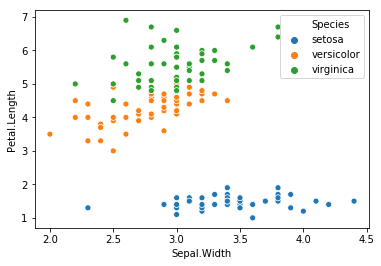

In [64]:
sns.scatterplot(data=iris, x='Sepal.Width', y='Petal.Length', hue='Species')
plt.show()

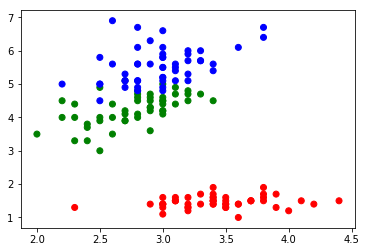

In [68]:
plt.scatter(iris['Sepal.Width'], iris['Petal.Length'], c=np.array(['red', 'green', 'blue'])[iris.Species.cat.codes])

In [73]:
# ordered categorical 
y = pd.Series(pd.Categorical(['s', 'l', 'm', 'l', 's', 'm', 'xs', 'xl']))

In [74]:
y

0     s
1     l
2     m
3     l
4     s
5     m
6    xs
7    xl
dtype: category
Categories (5, object): [l, m, s, xl, xs]

In [76]:
y.sort_values()

1     l
3     l
2     m
5     m
0     s
4     s
7    xl
6    xs
dtype: category
Categories (5, object): [l, m, s, xl, xs]

In [77]:
y = pd.Series(pd.Categorical(['s', 'l', 'm', 'l', 's', 'm', 'xs', 'xl'], 
                            ordered=True,
                            categories=['xs', 's', 'm', 'l', 'xl']))
y.sort_values()

6    xs
0     s
4     s
2     m
5     m
1     l
3     l
7    xl
dtype: category
Categories (5, object): [xs < s < m < l < xl]

In [80]:
y[y>='m']

1     l
2     m
3     l
5     m
7    xl
dtype: category
Categories (5, object): [xs < s < m < l < xl]

In [81]:
# sample, head, ... are class methods so these are 2 different methods:
tips.head() # DataFrame.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
tips.sex.head() # Series.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: object

## Indexes

In [83]:
x = tips.head().copy()
x

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# every DataFrame has 2 indexes
# every Series has 1 index

In [84]:
x.tip.index

RangeIndex(start=0, stop=5, step=1)

In [88]:
x.tip

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [89]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [87]:
x.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [90]:
x.index = pd.Index(['John', 'Mary', 'Falk', 'Thomas', 'John'])

In [91]:
x

,total_bill,tip,sex,smoker,day,time,size
John,16.99,1.01,Female,No,Sun,Dinner,2
Mary,10.34,1.66,Male,No,Sun,Dinner,3
Falk,21.01,3.50,Male,No,Sun,Dinner,3
Thomas,23.68,3.31,Male,No,Sun,Dinner,2
John,24.59,3.61,Female,No,Sun,Dinner,4


In [92]:
x.tip

John      1.01
Mary      1.66
Falk      3.50
Thomas    3.31
John      3.61
Name: tip, dtype: float64

In [93]:
x.rename({'total_bill': 'bill'}, axis=1) # inplace=False by default

,bill,tip,sex,smoker,day,time,size
John,16.99,1.01,Female,No,Sun,Dinner,2
Mary,10.34,1.66,Male,No,Sun,Dinner,3
Falk,21.01,3.50,Male,No,Sun,Dinner,3
Thomas,23.68,3.31,Male,No,Sun,Dinner,2
John,24.59,3.61,Female,No,Sun,Dinner,4


In [94]:
# indexes may have .name (s)
x.index.name='NAME'
x.columns.name='FEATURES'
x

FEATURES,total_bill,tip,sex,smoker,day,time,size
NAME,,,,,,,
John,16.99,1.01,Female,No,Sun,Dinner,2
Mary,10.34,1.66,Male,No,Sun,Dinner,3
Falk,21.01,3.50,Male,No,Sun,Dinner,3
Thomas,23.68,3.31,Male,No,Sun,Dinner,2
John,24.59,3.61,Female,No,Sun,Dinner,4


In [96]:
x.tip

NAME
John      1.01
Mary      1.66
Falk      3.50
Thomas    3.31
John      3.61
Name: tip, dtype: float64

In [97]:
x.reset_index()

FEATURES,NAME,total_bill,tip,sex,smoker,day,time,size
0,John,16.99,1.01,Female,No,Sun,Dinner,2
1,Mary,10.34,1.66,Male,No,Sun,Dinner,3
2,Falk,21.01,3.50,Male,No,Sun,Dinner,3
3,Thomas,23.68,3.31,Male,No,Sun,Dinner,2
4,John,24.59,3.61,Female,No,Sun,Dinner,4


In [98]:
x.reset_index(drop=True)

FEATURES,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [99]:
birth_dates.head().set_index('Name')

,BirthDate,BirthDate2
Name,,
Hung Hyun-Seok,12.06.2000,2000-06-12
Benno Blumenthal,31.12.1918,1918-12-31
Paitoon Ornwimol,26.06.1958,1958-06-26
P'yon Yong-Sun,10.07.1947,1947-07-10
Étienne Chaney,04.09.1983,1983-09-04


In [104]:
# hierarchical indexes
x.sort_values(['sex', 'size']).set_index(['sex', 'size'])

FEATURES     total_bill   tip smoker  day    time
sex    size                                      
Female 2          16.99  1.01     No  Sun  Dinner
       4          24.59  3.61     No  Sun  Dinner
Male   2          23.68  3.31     No  Sun  Dinner
       3          10.34  1.66     No  Sun  Dinner
       3          21.01  3.50     No  Sun  Dinner

In [105]:
x.sort_values(['sex', 'size']).set_index(['sex', 'size']).tip

sex     size
Female  2       1.01
        4       3.61
Male    2       3.31
        3       1.66
        3       3.50
Name: tip, dtype: float64

In [106]:
tips.groupby(['sex', 'day']).tip.mean()

sex     day 
Female  Fri     2.781111
        Sat     2.801786
        Sun     3.367222
        Thur    2.575625
Male    Fri     2.693000
        Sat     3.083898
        Sun     3.220345
        Thur    2.980333
Name: tip, dtype: float64

In [107]:
tips.groupby(['sex', 'day']).tip.mean().reset_index()

,sex,day,tip
0,Female,Fri,2.781111
1,Female,Sat,2.801786
2,Female,Sun,3.367222
3,Female,Thur,2.575625
4,Male,Fri,2.693000
5,Male,Sat,3.083898
6,Male,Sun,3.220345
7,Male,Thur,2.980333


In [108]:
tips.groupby(['sex', 'day']).tip.mean().unstack()

day,Fri,Sat,Sun,Thur
sex,,,,
Female,2.781111,2.801786,3.367222,2.575625
Male,2.693000,3.083898,3.220345,2.980333


In [109]:
s = birth_dates.set_index(['BirthDate2'])
s.head()

,Name,BirthDate
BirthDate2,,
2000-06-12,Hung Hyun-Seok,12.06.2000
1918-12-31,Benno Blumenthal,31.12.1918
1958-06-26,Paitoon Ornwimol,26.06.1958
1947-07-10,P'yon Yong-Sun,10.07.1947
1983-09-04,Étienne Chaney,04.09.1983


In [111]:
s.loc['2020-01-01':,:]

,Name,BirthDate
BirthDate2,,
2023-02-07,Lachina Gerald,07.02.2023
2028-02-18,Svetislav Bojanić,18.02.2028
2028-08-28,Jean-Guy Baudet,28.08.2028
2024-06-26,Vidak Krkobabić,26.06.2024
2021-06-22,Halász Barnabás,22.06.2021
2020-04-14,Guelfo Patalano,14.04.2020
2029-01-06,Mateusz Melánia,06.01.2029


In [112]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
# Exercise

In [137]:
flights['date'] = pd.to_datetime(flights.year.astype(str) + flights.month.astype(str), format='%Y%B')

In [138]:
flights.head()

,year,month,passengers,date
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01


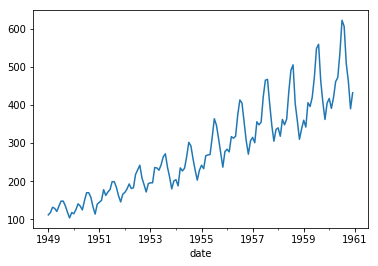

In [139]:
flights.set_index('date').passengers.plot()

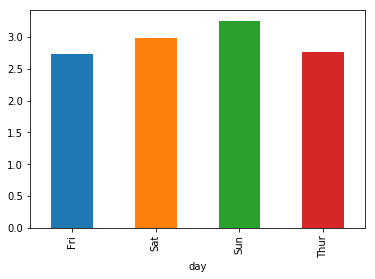

In [140]:
tips.groupby('day').tip.mean().plot(kind='bar')

## Indexing Series

In [141]:
np.random.seed(123)
b = np.round(np.random.uniform(0,1,10), 2)
b

array([0.7 , 0.29, 0.23, 0.55, 0.72, 0.42, 0.98, 0.68, 0.48, 0.39])

In [ ]:
# indexing numpy vector
# b[0]
# b[:5]
# b[ [0,1,2] ]
# b[ b>0.5 ]

In [142]:
b = pd.Series(b)
c = b.copy()
b.index = np.random.permutation(np.r_[0:10])
c.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [143]:
b

2    0.70
1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
6    0.68
3    0.48
0    0.39
dtype: float64

In [144]:
c

a    0.70
b    0.29
c    0.23
d    0.55
e    0.72
f    0.42
g    0.98
h    0.68
i    0.48
j    0.39
dtype: float64

In [ ]:
# NEVER APPLY [] ON SERIES DIRECTLY

In [145]:
b[0:1]

2    0.7
dtype: float64

In [146]:
b[0]

0.39

In [147]:
b[ [0] ]

0    0.39
dtype: float64

In [148]:
# .iloc[] -- pistion-based indexing (physical index)
# .loc[]  -- label-based indexing (.index index)

In [150]:
b.loc[0]

0.39

In [151]:
b.iloc[0]

0.7

In [152]:
b.iloc[0:7]

2    0.70
1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
dtype: float64

In [153]:
b.loc[1:7]

1    0.29
8    0.23
7    0.55
dtype: float64

In [154]:
c.loc['d':'f']

d    0.55
e    0.72
f    0.42
dtype: float64

In [155]:
c.loc[ c>0.7 ]

e    0.72
g    0.98
dtype: float64

In [156]:
c.loc[ ['a', 'd'] ]

a    0.70
d    0.55
dtype: float64

In [158]:
c.iloc[ c.values>0.7 ] # boolean ndarray

e    0.72
g    0.98
dtype: float64

## Indexing DataFrames

In [160]:
tips.loc[tips.tip>7,'tip':'day']

,tip,sex,smoker,day
23,7.58,Male,No,Sat
170,10.00,Male,Yes,Sat
212,9.00,Male,No,Sat


In [161]:
tips.loc[tips.tip>7,:]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [162]:
tips.loc[tips.tip>7,:].iloc[:,0:4]

,total_bill,tip,sex,smoker
23,39.42,7.58,Male,No
170,50.81,10.00,Male,Yes
212,48.33,9.00,Male,No


## with tips:

1. In `tips`, select data on male customers where total bill was in $[10,20]$.

2. In `tips`, select data from Saturday and Sunday with tip $>\$5$.

3. partition `tips`: create 2 dfs: `tips_train` (80%) and tips_test (20% rows)

4. in tips, select all columns but sex,smoker, and day without referring to other columns' names explicitly

In [163]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [197]:
tips.loc[(tips.total_bill>10) & (tips.total_bill<20) & (tips.sex == 'Male'),:].head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2


In [199]:
tips.loc[(tips.total_bill.between(10,20)) & (tips.sex == 'Male'),:].head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2


In [200]:
tips.query('10 <= total_bill <= 20 and sex == "Male"').head() # this is the fastest way for large dataframes

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2


In [183]:
tips.loc[(tips.day == 'Sun') | (tips.day == 'Sat'),:].loc[tips.tip > 5,:]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2


In [201]:
tips.query('(day in ["Sat","Sun"]) and tip > 5')

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2


In [178]:
msk = np.random.rand(len(tips)) < 0.8
tips_train = tips[msk]
tips_test = tips[~msk]

In [180]:
tips_train.shape

(199, 7)

In [184]:
tips_test.shape

(45, 7)

In [ ]:
tips2 = tips.sample(frac=1.0, random_state=123)
hwmny = round(tips2.shape[0]*0.8)

tips_train = tips2.head(round(hwmny))
tips_test = tips2.tail(tips2.shape[0]-hwmny)

tips_train = tips2.iloc[:hwmny,:]
tips_test = tips2.iloc[hwmny:,:]

tips_train = tips.sample(frac=0.8)
tips_test = tips.loc[tips.index.difference(tips_train.index),:]

In [ ]:
idx = np.random.permutation(np.arrange(tips.shape[0]))
tips_train = tips.iloc[idx[:hwmny],:]
tips_test  = tips.iloc[idx[hwmny:],:]

In [202]:
tips.loc[:, tips.columns.difference(['sex', 'smoker', 'day'])].head()

,size,time,tip,total_bill
0,2,Dinner,1.01,16.99
1,3,Dinner,1.66,10.34
2,3,Dinner,3.50,21.01
3,2,Dinner,3.31,23.68
4,4,Dinner,3.61,24.59


In [203]:
tips.loc[:,~tips.columns.isin(['sex','smoker''day'])].head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Operations on Series and DataFrames

In [204]:
x = tips.sample(5, random_state=123)
y = x['total_bill']
y

112    38.07
19     20.65
187    30.46
169    10.63
31     18.35
Name: total_bill, dtype: float64

In [205]:
y.values * y.values

array([1449.3249,  426.4225,  927.8116,  112.9969,  336.7225])

In [206]:
y * y

112    1449.3249
19      426.4225
187     927.8116
169     112.9969
31      336.7225
Name: total_bill, dtype: float64

In [210]:
z = y.sample(frac=1.0)
z * y

19      426.4225
31      336.7225
112    1449.3249
169     112.9969
187     927.8116
Name: total_bill, dtype: float64

In [211]:
# label wise !!!!

In [212]:
vehicles = pd.read_csv('http://www.gagolewski.com/resources/data/fueleconomy_vehicles.csv.gz', comment='#')

Given fueleconomy::vehicles, convert the values in
cty (city-) and hwy (highway-fuel economy -- given in mpg)
to l/100 km.   

Then add new columns z_cty and z_hwy, that give z-scores of cty and hwy (i.e., standardize these columns).  

Moreover, add two other columns z_cty_rel and z_hwy_rel, which denote the corresponding z-scores relative to (grouped by) **class**.  


In [214]:
vehicles.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18
1,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18
2,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13
3,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13
4,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4.0,2.5,Regular,17,16


In [215]:
v = vehicles

In [222]:
v['hwy'] = 1 / ((1.60/3.78) * v.hwy )* 100
v['cty'] = 1 / ((1.60/3.78) * v.cty )* 100
v.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty,hwy_,cty_
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,13.897059,13.125000,13.897059,13.125000
1,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,13.897059,13.125000,13.897059,13.125000
2,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,18.173077,18.173077,18.173077,18.173077
3,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,18.173077,18.173077,18.173077,18.173077
4,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4.0,2.5,Regular,13.897059,14.765625,13.897059,14.765625


In [227]:
v['z_hwy'] = (v['hwy'] - np.mean(v['hwy'], axis=0))/np.std(v['hwy'], axis=0, ddof=1)
v
#v['z_cty']

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty,hwy_,cty_,z_hwy
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,13.897059,13.125000,13.897059,13.125000,1.166924
1,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,13.897059,13.125000,13.897059,13.125000,1.166924
2,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,18.173077,18.173077,18.173077,18.173077,2.720036
3,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,18.173077,18.173077,18.173077,18.173077,2.720036
4,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4.0,2.5,Regular,13.897059,14.765625,13.897059,14.765625,1.166924
5,1033,AM General,Post Office DJ8 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,6.0,4.2,Regular,18.173077,18.173077,18.173077,18.173077,2.720036
6,3347,ASC Incorporated,GNX,1987,Midsize Cars,Automatic 4-spd,Rear-Wheel Drive,6.0,3.8,Premium,11.250000,16.875000,11.250000,16.875000,0.205473
7,13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4.0,2.2,Regular,9.086538,11.812500,9.086538,11.812500,-0.580328
8,13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4.0,2.2,Regular,8.437500,10.738636,8.437500,10.738636,-0.816068
9,13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.0,Regular,9.086538,13.125000,9.086538,13.125000,-0.580328


In [234]:
v_c = v.groupby('class').agg({'hwy':'mean', 'id':'count'})
v_c['product'] = v_c['hwy'] * v_c['id']
v_c['std'] = (v_c['product'] - np.mean(v_c['product']))/np.std(v_c['product'], ddof=1)
v_c
#v_c_meanhwy = v.groupby(v['class']).mean()['hwy']
#v_c_count = v.groupby(v['class']).count()['id']
#v_c['z_hwy_rel'] = (v_c['hwy'] - np.mean(v_c['hwy'], axis=0))/np.std(v_c['hwy'], axis=0, ddof=1)
v_c

#v['z_hwy_rel']
#v['z_cty_rel']

,hwy,id,product,std
class,,,,
Compact Cars,8.801606,4739,41710.810499,2.646186
Large Cars,10.338328,1533,15848.656391,0.452853
Midsize Cars,9.537741,3621,34536.160146,2.037714
Midsize Station Wagons,9.509805,415,3946.569172,-0.556546
Midsize-Large Station Wagons,9.943217,627,6234.397249,-0.362518
Minicompact Cars,9.675265,1080,10449.286213,-0.005060
Minivan - 2WD,10.237566,308,3153.170285,-0.623833
Minivan - 4WD,11.043838,44,485.928854,-0.850038
Small Pickup Trucks,10.308318,538,5545.875031,-0.420911
